Git Journey

integrating the function u' = u + sin(t)
using the formula for ETD method
exact solution is:

$u(t_{n+1}) = u(t_n)*e^{(c*h)} + e^{(c*h)}*integral(F(u(k+t_n),k+t_n)*e^{-ck}dk) $

Trying to solve:

$u' = cu + sin(t)$

Therefore our F(u,t) = sin(t)

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##compartmentalising for the future
c = 0 
## ^ for posterity

def F(t):
    # our non linear component
    return np.sin(t)

def timestep(u_n, I, h):
    # u_n is the previous time step
    # I is the integral of the non linear part
    # h is out time step width
    #print("u_n =", u_n )
    #print("I =", I )
    #print("h =", h )
    return u_n*np.exp(c*h) + I

#Cool now I want to decide what I is. If I choose F is approximately a constant 
def I_const(t,h):
    return F(t)*(np.exp(c*h)-1)

In [3]:
T = Total_Time = 5 
h = Step_Size = 0.01
u_0 = Initial_Condition = 5

N = int(T/h) ## Number of points, not including the 0th position
tvec = np.arange(N+1)*h
uvec = np.zeros(N+1)
uvec[0] = u_0


print(I_const(tvec[0],h))

0.0


In [4]:
c = -10
def ETD1(Total_Time, Step_Size, Initial_Condition):
    T = Total_Time
    h = Step_Size
    u_0 = Initial_Condition

    N = int(T/h) ## Number of points, not including the 0th position
    tvec = np.arange(N+1)*h
    uvec = np.zeros(N+1)
    uvec[0] = u_0


    for i in range(N):
        I = I_const(tvec[i],h)
        uvec[i+1] = timestep(uvec[i], I, h)
    return uvec,tvec




In [28]:
y,x = ETD1(5,0.1,5)

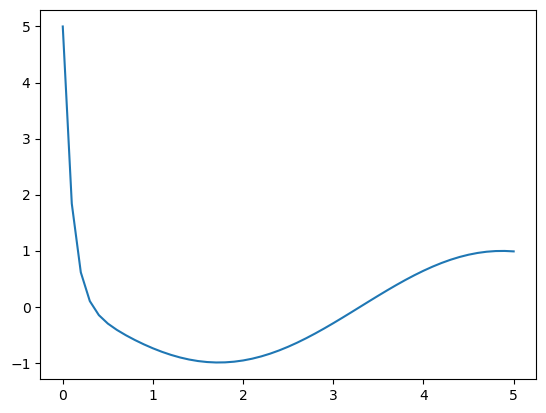

In [29]:
plt.plot(x,y)

Well we know theres an analytic solution to this given by

 $u_0 e^{ct} + \frac{e^{ct}-c*sin(t)-cos(t)}{1+c^2}$

In [30]:
def U_true(t,u_0):
    return u_0*np.exp(c*t) + (np.exp(c*t)-c*np.sin(t)-np.cos(t))/(1+c**2)

<function matplotlib.pyplot.show(close=None, block=None)>

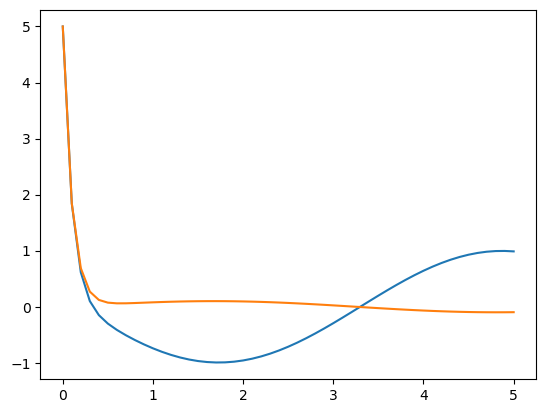

In [31]:
plt.plot(x,y)
plt.plot(x,U_true(x,5))
plt.show

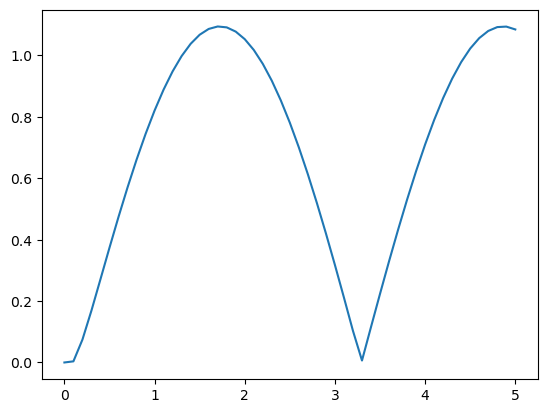

In [32]:
plt.plot(x,np.abs(y - U_true(x,5)))

In [33]:
##Maybe taking F to be a constant is too far. 
## lets do ETD2

def I_nonconst(t,h):
    return F(t)*((1+h*c)*np.exp(1)**(c*h) -1 - 2*h*c)/(h*c**2) +F(t-h)*(1+h*c-np.exp(1)**(c*h))/(h*c**2)

In [34]:
def ETD2(Total_Time, Step_Size, Initial_Condition):
    T = Total_Time
    h = Step_Size
    u_0 = Initial_Condition

    N = int(T/h) ## Number of points, not including the 0th position
    tvec = np.arange(N+1)*h
    uvec = np.zeros(N+1)
    uvec[0] = u_0


    for i in range(N):
        I = I_nonconst(tvec[i],h)
        uvec[i+1] = timestep(uvec[i], I, h)
    return uvec,tvec

In [35]:
y2,x2 = ETD2(5,0.1,5)

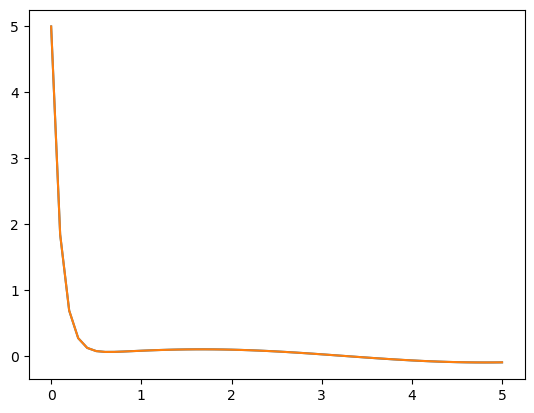

In [36]:
plt.plot(x2,y2)
plt.plot(x,U_true(x,5))

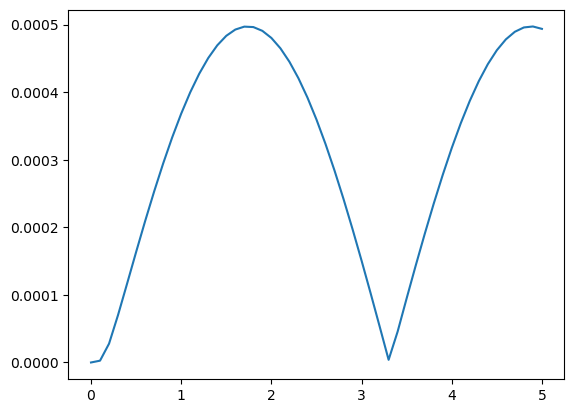

In [37]:
plt.plot(x,np.abs(y2 - U_true(x,5)))